<a href="https://colab.research.google.com/github/mikmiklolhaha/ie-trends-activity/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation
In datapreparation there are several activities that we need to perform, namely. Data Cleaning and Data Transformation. We will discuss the concepts of these activities and how do we do them using Pandas.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Cleaning
Data cleaning is the process of fixing or erroneous, corrupted, misformatted, duplicate, or incomplete data within a dataset.

In [39]:
naia_df = pd.read_excel("NAIA Daily 2017.xlsx")
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
0,NaN,NaN,NaN,mm,°C,°C,°C,m/s,degrees
1,2017.0,1.0,1.0,0,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,T,NaN,24.2,NaN,2,100
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.5,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0,29.5,22.8,26.15,3,70


In [40]:
### Dropping Rows
naia_df = naia_df.drop(index=0)
## original_file = file operation

In [41]:
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,T,NaN,24.2,NaN,2,100
5,2017.0,1.0,5.0,0.45,NaN,22.78,NaN,2,110
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.5,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0,29.5,22.8,26.15,3,70


In [42]:
### NaN Values
naia_df.isna().sum()

YEAR               0
MONTH              0
DAY                0
RAINFALL           0
TMAX              11
TMIN               8
TMEAN             45
WIND SPEED         0
WIND DIRECTION     0
dtype: int64

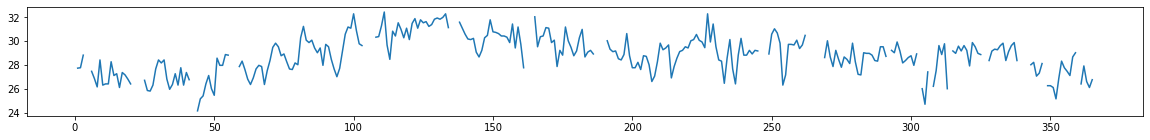

In [43]:
## Exploring the data
plt.figure(figsize=(20,2))
naia_df['TMEAN'].plot()

In [44]:
### Converting Data Types
naia_df.astype(float)

ValueError: ignored

In [45]:
### Check datatypes
naia_df.dtypes

YEAR              float64
MONTH             float64
DAY               float64
RAINFALL           object
TMAX               object
TMIN               object
TMEAN              object
WIND SPEED         object
WIND DIRECTION     object
dtype: object

In [46]:
"""
Cleaning Rules:
T - 0.01
"""
### Fill in the T
naia_df['RAINFALL'] = naia_df['RAINFALL'].replace({"T":0.01})
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0.00,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0.00,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0.00,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,0.01,NaN,24.2,NaN,2,100
5,2017.0,1.0,5.0,0.45,NaN,22.78,NaN,2,110
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.50,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0.00,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0.00,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0.00,29.5,22.8,26.15,3,70


In [47]:
### Converting Data Types Again!
naia_df = naia_df.astype(float)

In [48]:
## Check datatypes
naia_df.dtypes

YEAR              float64
MONTH             float64
DAY               float64
RAINFALL          float64
TMAX              float64
TMIN              float64
TMEAN             float64
WIND SPEED        float64
WIND DIRECTION    float64
dtype: object

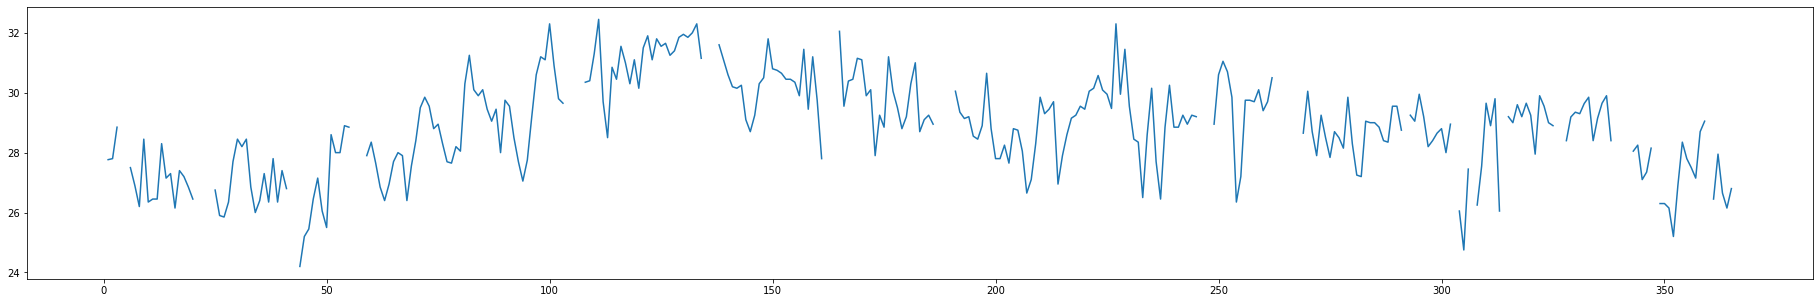

In [49]:
## Check the data again
plt.figure(figsize=(32,5))
naia_df['TMEAN'].plot()

In [50]:
## Connect the dots
naia_df['TMEAN'] = naia_df['TMEAN'].interpolate()
naia_df['TMIN'] = naia_df['TMIN'].interpolate()
naia_df['TMAX'] = naia_df['TMAX'].interpolate()

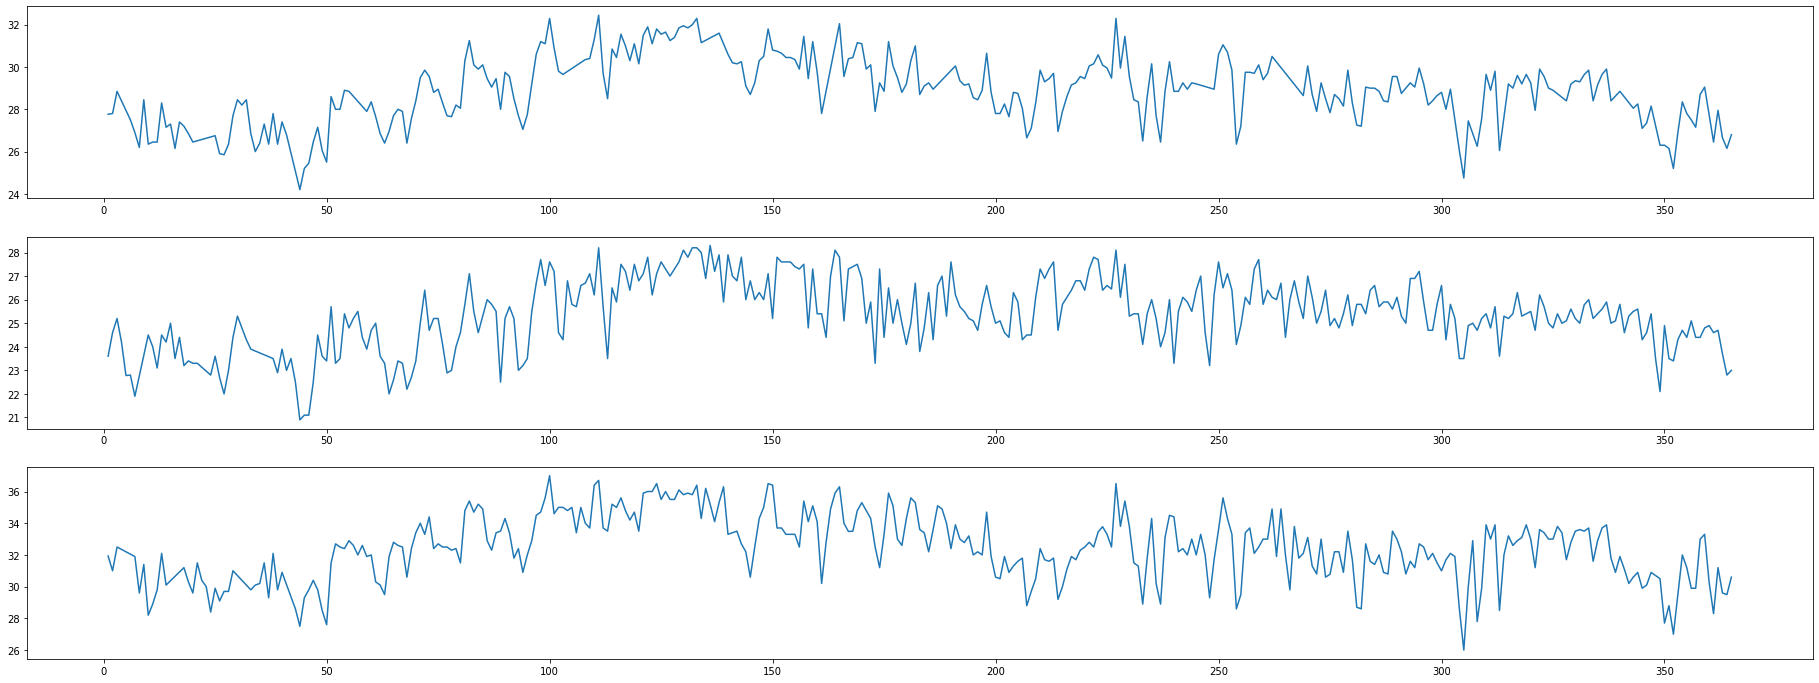

In [52]:
## Check the data again
plt.figure(figsize=(32,12))
plt.subplot(311)
naia_df['TMEAN'].plot()
plt.subplot(312)
naia_df['TMIN'].plot()
plt.subplot(313)
naia_df['TMAX'].plot()

In [53]:
### Applying a conversion
def celsius_to_kelvin(temp):
  K = temp + 273.15
  return K
celsius_to_kelvin(32)

305.15

In [54]:
naia_temps = naia_df[['TMIN','TMAX','TMEAN']]
naia_df[['TMIN','TMAX','TMEAN']] = celsius_to_kelvin(naia_temps)
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0.00,305.081,296.75,300.9155,3.0,80.0
2,2017.0,1.0,2.0,0.00,304.150,297.75,300.9500,2.0,70.0
3,2017.0,1.0,3.0,0.00,305.650,298.35,302.0000,3.0,80.0
4,2017.0,1.0,4.0,0.01,305.500,297.35,301.5500,2.0,100.0
5,2017.0,1.0,5.0,0.45,305.350,295.93,301.1000,2.0,110.0
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.50,301.450,297.75,299.6000,2.0,70.0
362,2017.0,12.0,28.0,0.00,304.350,297.85,301.1000,3.0,70.0
363,2017.0,12.0,29.0,0.00,302.750,296.85,299.8000,3.0,70.0
364,2017.0,12.0,30.0,0.00,302.650,295.95,299.3000,3.0,70.0


In [56]:
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,2017,1,1,0.00,305.081,296.75,300.9155,3.0,80.0,2017/1/1
2,2017,1,2,0.00,304.150,297.75,300.9500,2.0,70.0,2017/1/2
3,2017,1,3,0.00,305.650,298.35,302.0000,3.0,80.0,2017/1/3
4,2017,1,4,0.01,305.500,297.35,301.5500,2.0,100.0,2017/1/4
5,2017,1,5,0.45,305.350,295.93,301.1000,2.0,110.0,2017/1/5
...,...,...,...,...,...,...,...,...,...,...
361,2017,12,27,1.50,301.450,297.75,299.6000,2.0,70.0,2017/12/27
362,2017,12,28,0.00,304.350,297.85,301.1000,3.0,70.0,2017/12/28
363,2017,12,29,0.00,302.750,296.85,299.8000,3.0,70.0,2017/12/29
364,2017,12,30,0.00,302.650,295.95,299.3000,3.0,70.0,2017/12/30


In [61]:
### Make Dates
naia_df[["YEAR","MONTH","DAY"]] = naia_df[["YEAR","MONTH","DAY"]].astype(int).astype(str)
naia_df['DATE'] = naia_df[["MONTH","DAY","YEAR"]].agg('/'.join,axis=1)
## MM/DD/YYYY
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,2017,1,1,0.00,305.081,296.75,300.9155,3.0,80.0,1/1/2017
2,2017,1,2,0.00,304.150,297.75,300.9500,2.0,70.0,1/2/2017
3,2017,1,3,0.00,305.650,298.35,302.0000,3.0,80.0,1/3/2017
4,2017,1,4,0.01,305.500,297.35,301.5500,2.0,100.0,1/4/2017
5,2017,1,5,0.45,305.350,295.93,301.1000,2.0,110.0,1/5/2017
...,...,...,...,...,...,...,...,...,...,...
361,2017,12,27,1.50,301.450,297.75,299.6000,2.0,70.0,12/27/2017
362,2017,12,28,0.00,304.350,297.85,301.1000,3.0,70.0,12/28/2017
363,2017,12,29,0.00,302.750,296.85,299.8000,3.0,70.0,12/29/2017
364,2017,12,30,0.00,302.650,295.95,299.3000,3.0,70.0,12/30/2017


In [62]:
naia_df.drop(labels=["MONTH","DAY","YEAR"],axis=1)

,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,0.00,305.081,296.75,300.9155,3.0,80.0,1/1/2017
2,0.00,304.150,297.75,300.9500,2.0,70.0,1/2/2017
3,0.00,305.650,298.35,302.0000,3.0,80.0,1/3/2017
4,0.01,305.500,297.35,301.5500,2.0,100.0,1/4/2017
5,0.45,305.350,295.93,301.1000,2.0,110.0,1/5/2017
...,...,...,...,...,...,...,...
361,1.50,301.450,297.75,299.6000,2.0,70.0,12/27/2017
362,0.00,304.350,297.85,301.1000,3.0,70.0,12/28/2017
363,0.00,302.750,296.85,299.8000,3.0,70.0,12/29/2017
364,0.00,302.650,295.95,299.3000,3.0,70.0,12/30/2017


In [63]:
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,2017,1,1,0.00,305.081,296.75,300.9155,3.0,80.0,1/1/2017
2,2017,1,2,0.00,304.150,297.75,300.9500,2.0,70.0,1/2/2017
3,2017,1,3,0.00,305.650,298.35,302.0000,3.0,80.0,1/3/2017
4,2017,1,4,0.01,305.500,297.35,301.5500,2.0,100.0,1/4/2017
5,2017,1,5,0.45,305.350,295.93,301.1000,2.0,110.0,1/5/2017
...,...,...,...,...,...,...,...,...,...,...
361,2017,12,27,1.50,301.450,297.75,299.6000,2.0,70.0,12/27/2017
362,2017,12,28,0.00,304.350,297.85,301.1000,3.0,70.0,12/28/2017
363,2017,12,29,0.00,302.750,296.85,299.8000,3.0,70.0,12/29/2017
364,2017,12,30,0.00,302.650,295.95,299.3000,3.0,70.0,12/30/2017


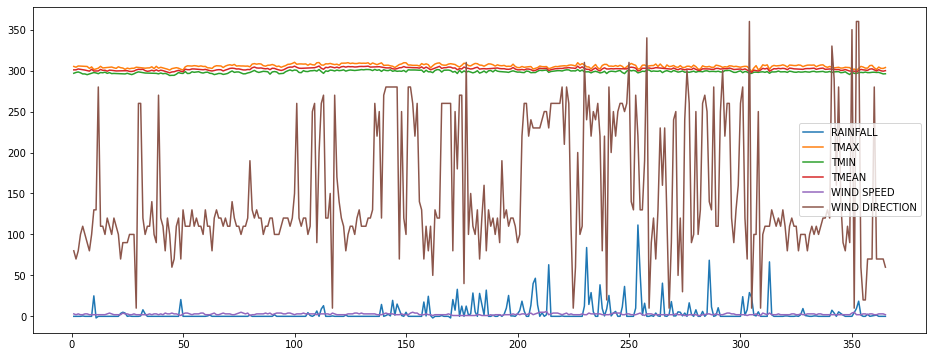

In [64]:
X = naia_df.drop(labels=["DATE"], axis=1)
X.plot(figsize=(16,6))
plt.savefig("naia-weather.jpg", dpi=300)

# Normalization
Normalization is a scaling techniqye in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler() #Initialize
norm = norm_scaler.fit(X)

## Transform the target dataset
X_norm = norm.transform(X)
pd.DataFrame(X_norm).plot(figsize=16,6))